This Notebook presents a baseline model that works with both numerical and categorical data features

Next models must make use of categorical features and outperform baseline

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv("./dataset/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
train.shape

(1460, 81)

# Missing Values

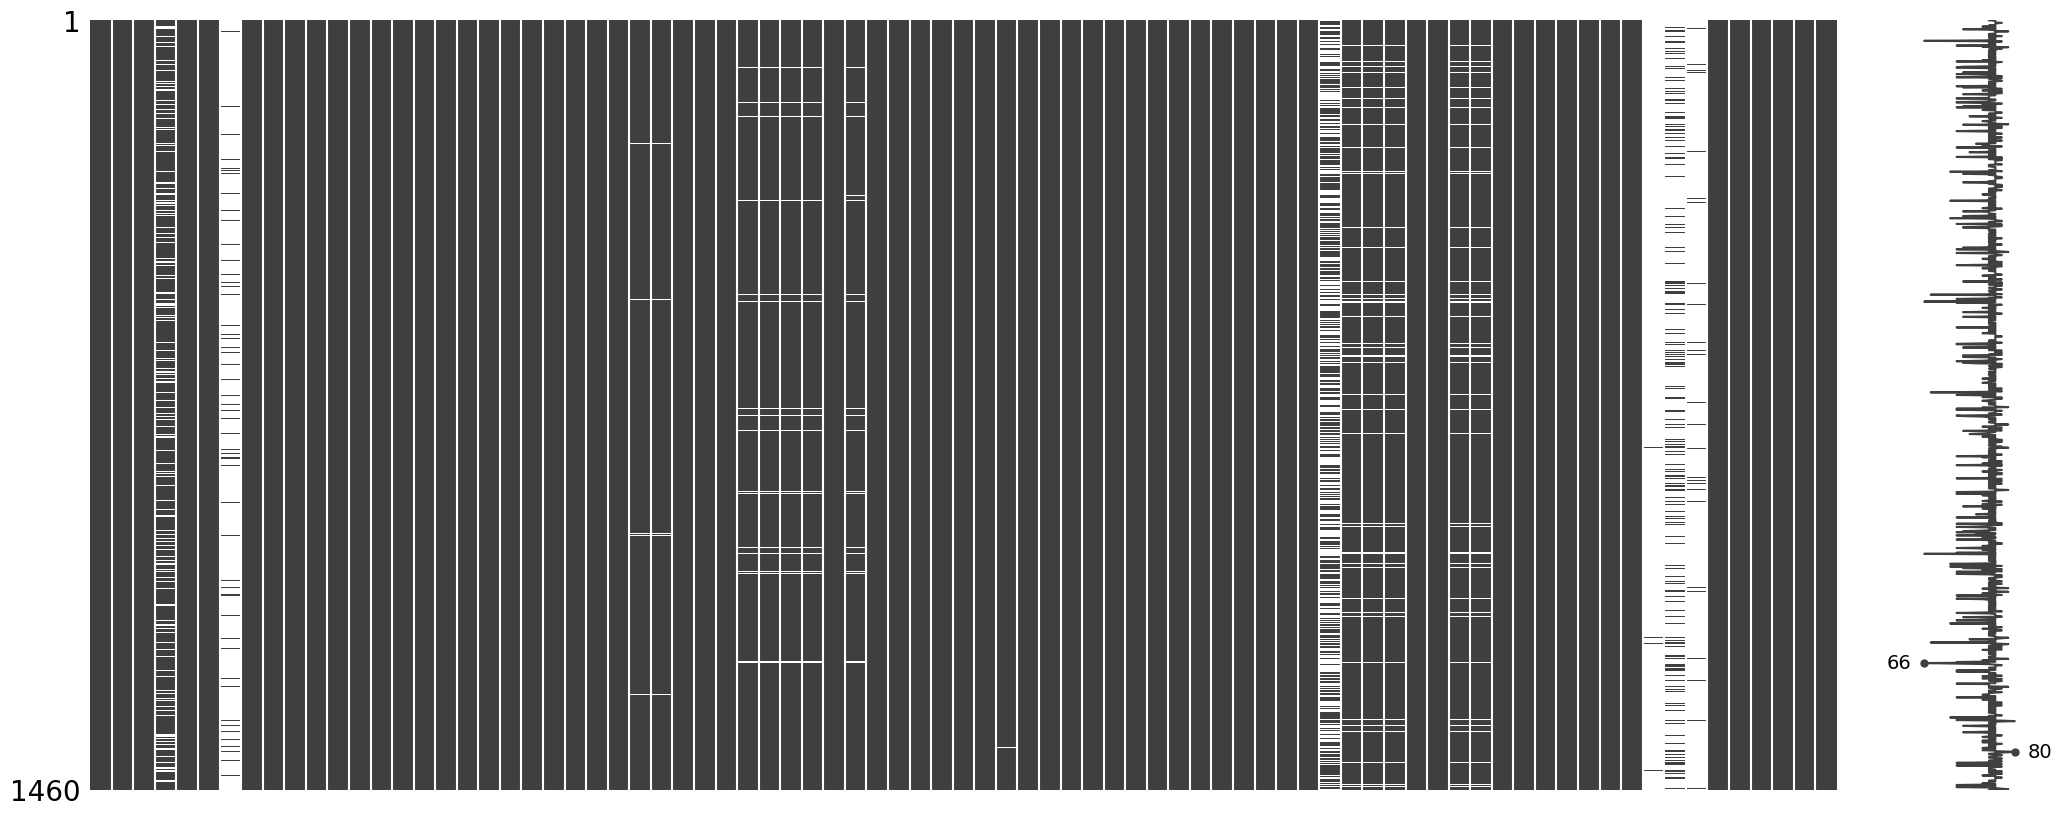

In [33]:
import missingno as msno

msno.matrix(train);

## Features that have more than 20% missing values must be dropped!

In [ ]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    # Get Missing Velues per feature (exclude features that are complete)
    feature_missing = df.isnull().sum().sort_values(ascending = False)
    feature_missing = feature_missing[feature_missing > 0]
    percent = round(feature_missing/len(df)*100, 2)
    return pd.concat([feature_missing, percent], axis=1, keys=['Total','Percent'])

missing_percentage(train)

# Encoding Categorical Features

In [5]:
train_categorical = train.select_dtypes(include="object")
train_numerical = train.select_dtypes(exclude="object")

In [6]:
train_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [31]:
train_numerical.isna().sum().sum(), train_categorical.isna().sum().sum()

(348, 6617)

## If feature has more than 10-15 categories - one-hot-encoding is not a good case

In [24]:
unique_values = sorted({feature: len(train_categorical[feature].unique()) for feature in train_categorical.columns}.items(), key=lambda x:x[1])
unique_values
# plt.hist(unique_values)

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('Alley', 3),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('ExterQual', 4),
 ('KitchenQual', 4),
 ('GarageFinish', 4),
 ('PoolQC', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('MasVnrType', 5),
 ('ExterCond', 5),
 ('BsmtQual', 5),
 ('BsmtCond', 5),
 ('BsmtExposure', 5),
 ('HeatingQC', 5),
 ('Fence', 5),
 ('MiscFeature', 5),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('Electrical', 6),
 ('FireplaceQu', 6),
 ('GarageQual', 6),
 ('GarageCond', 6),
 ('SaleCondition', 6),
 ('BsmtFinType1', 7),
 ('BsmtFinType2', 7),
 ('Functional', 7),
 ('GarageType', 7),
 ('Condition2', 8),
 ('HouseStyle', 8),
 ('RoofMatl', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

Only 3 features have more than 10 categories. I will drop them and encode all the rest

In [26]:
train_categorical.drop(["Exterior2nd", "Exterior1st", "Neighborhood"], axis=1, inplace=True)

In [27]:
encoded_categories = pd.get_dummies(train_categorical)
encoded_categories.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [28]:
train_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [30]:
train_numerical.shape, encoded_categories.shape

((1460, 38), (1460, 196))

In [ ]:
train = pd.concat([train_numerical, encoded_categories])

In [34]:
numerical_train = train.select_dtypes(exclude="object")
numerical_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [35]:
numerical_train.shape

(1460, 38)

# Missing Values

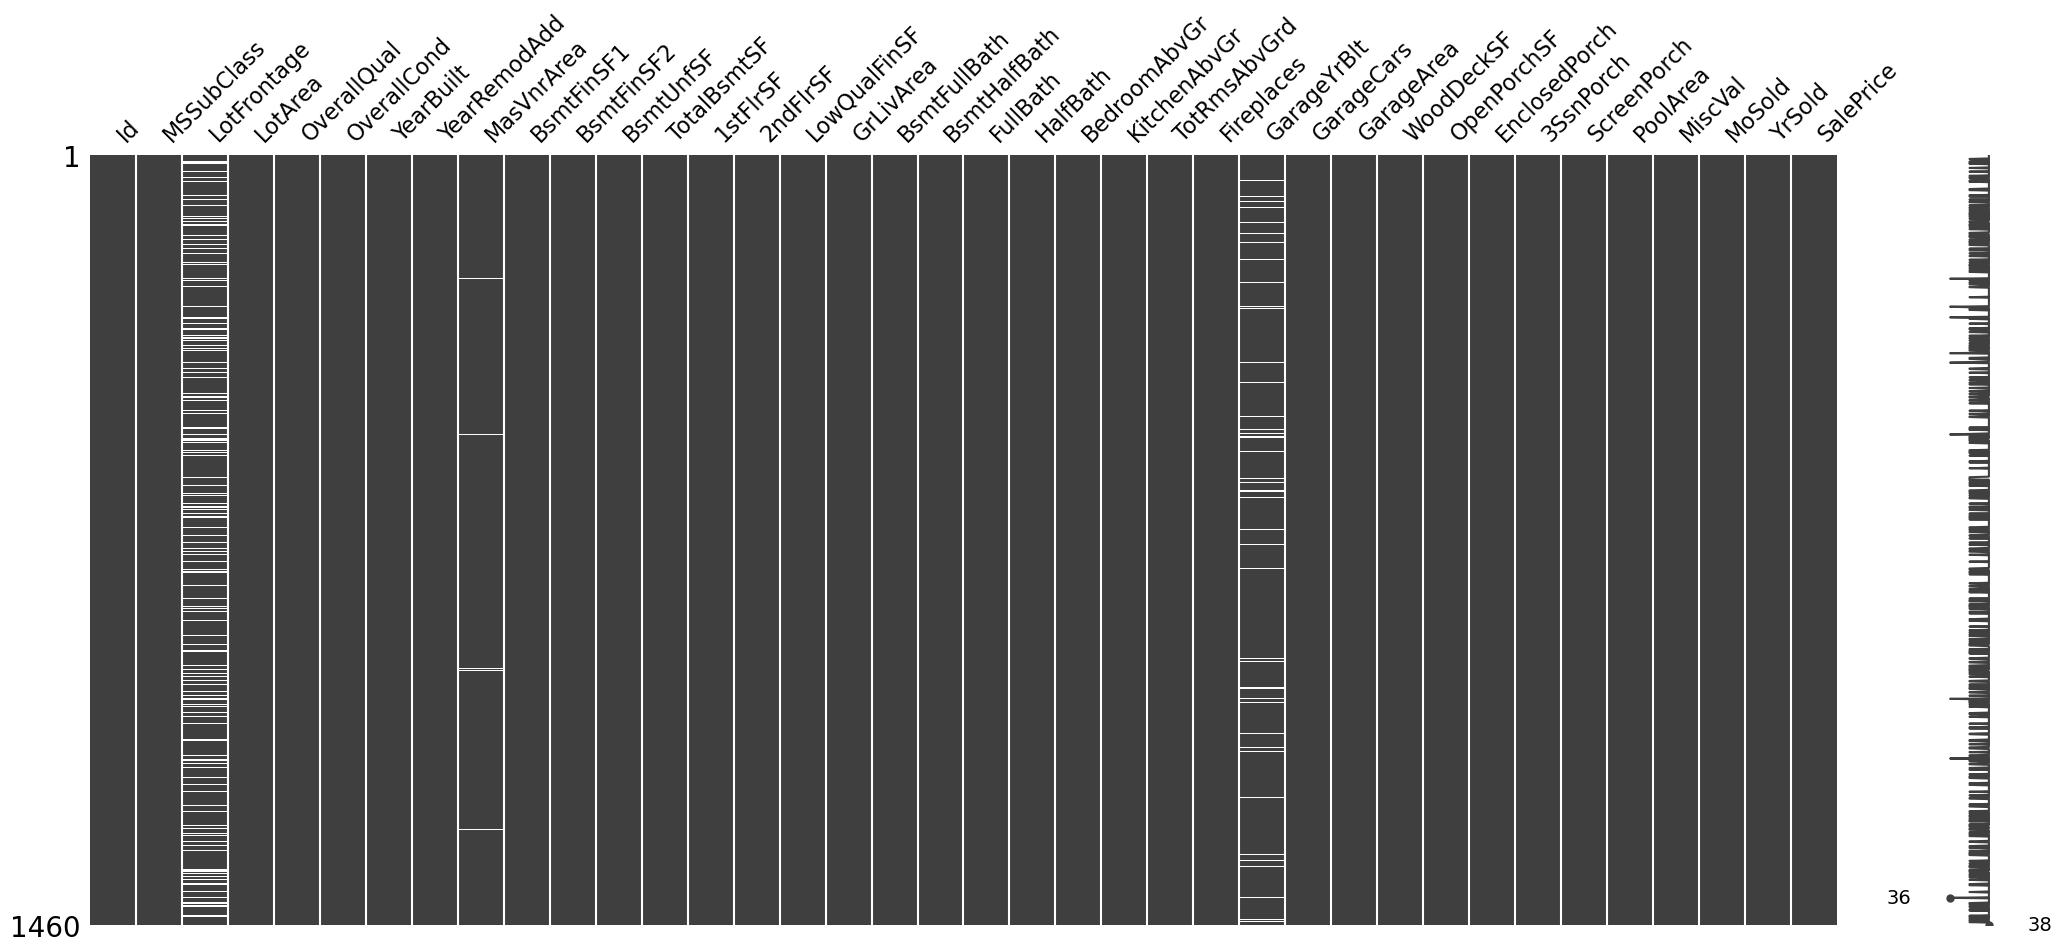

In [36]:
import missingno as msno

msno.matrix(numerical_train);

In [37]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    # Get Missing Velues per feature (exclude features that are complete)
    feature_missing = df.isnull().sum().sort_values(ascending = False)
    feature_missing = feature_missing[feature_missing > 0]
    percent = round(feature_missing/len(df)*100, 2)
    return pd.concat([feature_missing, percent], axis=1, keys=['Total','Percent'])

missing_percentage(numerical_train)

,Total,Percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55


In [38]:
numerical_train.drop(["LotFrontage"], axis=1, inplace=True)

In [39]:
missing_percentage(numerical_train)

,Total,Percent
GarageYrBlt,81,5.55
MasVnrArea,8,0.55


In [40]:
numerical_train.fillna(numerical_train.mean(), inplace = True)

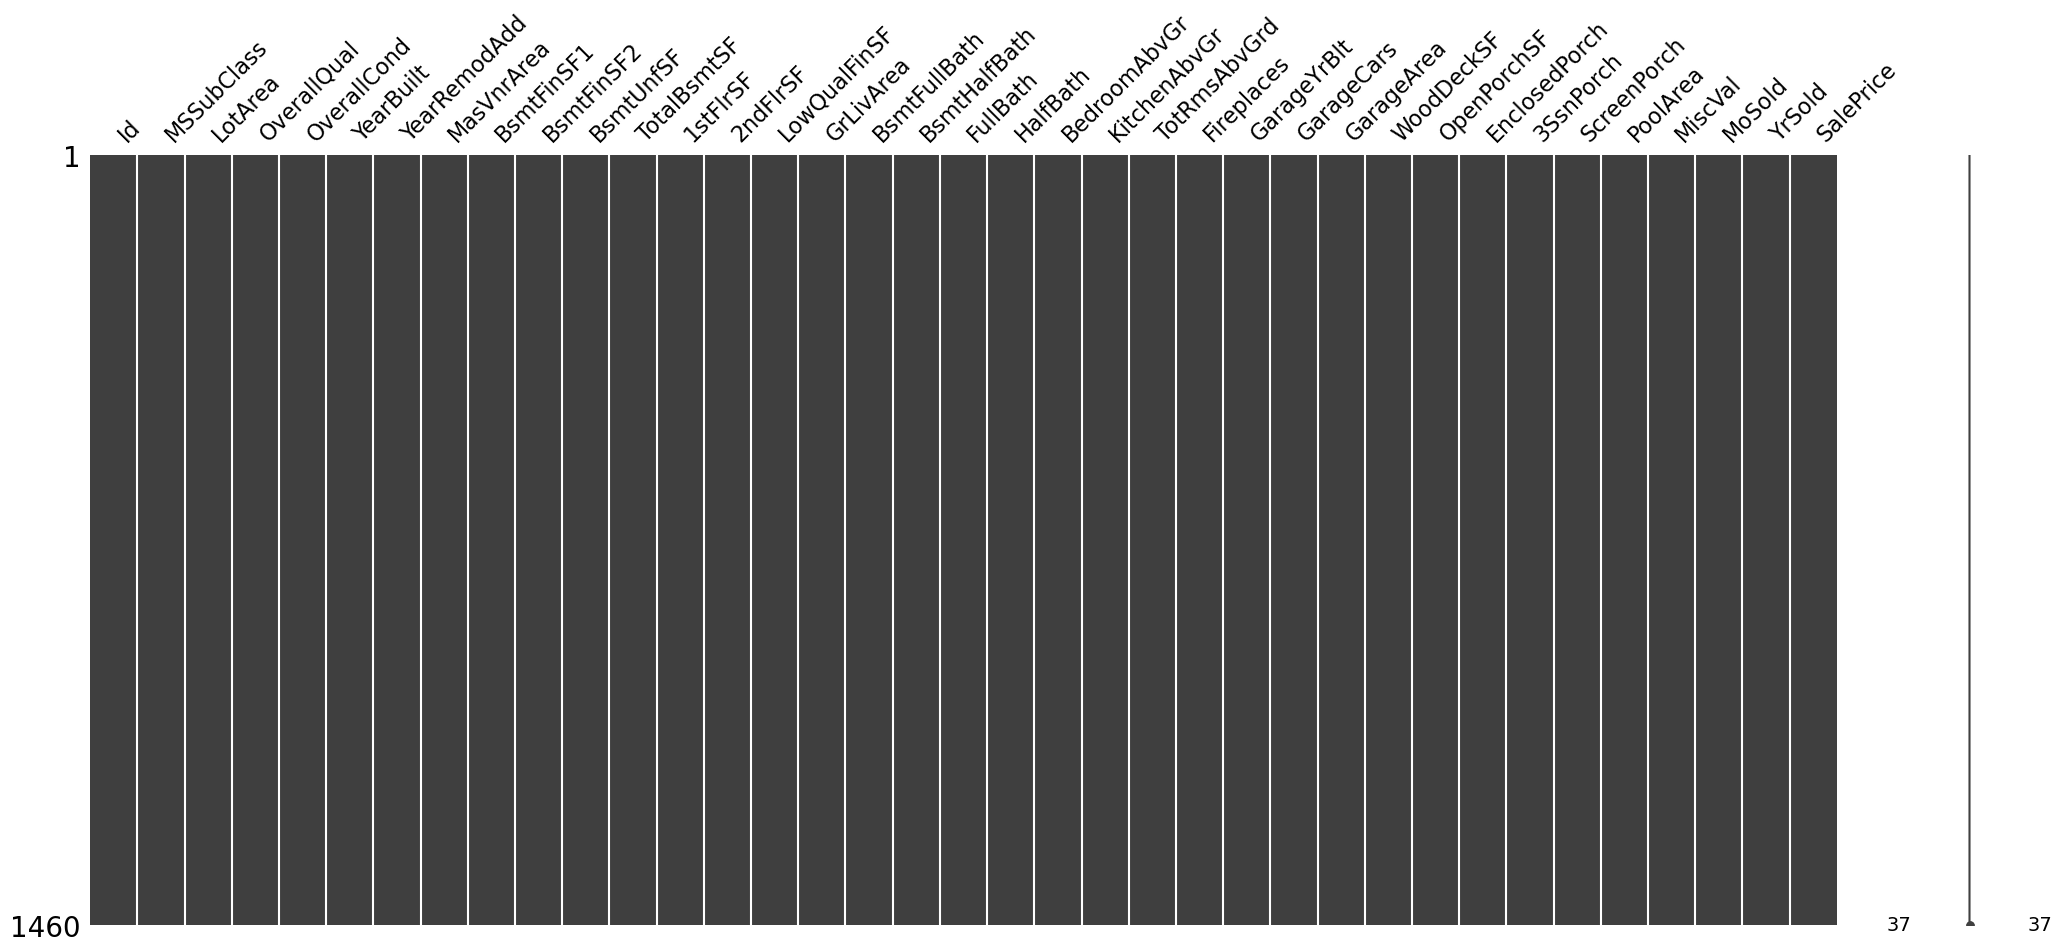

In [41]:
msno.matrix(numerical_train);

# Data Separation

In [46]:
Y = numerical_train["SalePrice"]
X = numerical_train.drop(["SalePrice"], axis=1)

# Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X))

In [51]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [55]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [54]:
X.shape, Y.shape

((1460, 36), (1460,))

# Modeling

In [61]:
from keras.layers import Dense, Input
from keras.models import Sequential

model = Sequential()
model.add(Input(shape = (X.shape[1],), batch_size=1))
model.add(Dense(100, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (1, 100)                  3700      
                                                                 
 dense_22 (Dense)            (1, 200)                  20200     
                                                                 
 dense_23 (Dense)            (1, 300)                  60300     
                                                                 
 dense_24 (Dense)            (1, 300)                  90300     
                                                                 
 dense_25 (Dense)            (1, 200)                  60200     
                                                                 
 dense_26 (Dense)            (1, 100)                  20100     
                                                                 
 dense_27 (Dense)            (1, 1)                   

In [62]:
model.compile(loss='mean_absolute_error', optimizer="adam")

In [63]:
history = model.fit(x=X, y=Y, batch_size=1, epochs=100, validation_split=0.2)

Epoch 1/100
1168/1168 [==============================] - 4s 3ms/step - loss: 39438.5117 - val_loss: 30880.5000
Epoch 2/100
1168/1168 [==============================] - 3s 3ms/step - loss: 25932.4902 - val_loss: 32278.2461
Epoch 3/100
1168/1168 [==============================] - 3s 2ms/step - loss: 24365.3711 - val_loss: 25356.2676
Epoch 4/100
1168/1168 [==============================] - 3s 3ms/step - loss: 22830.5254 - val_loss: 34525.1523
Epoch 5/100
1168/1168 [==============================] - 3s 3ms/step - loss: 21680.4922 - val_loss: 64199.9531
Epoch 6/100
1168/1168 [==============================] - 3s 3ms/step - loss: 22164.1758 - val_loss: 25661.2031
Epoch 7/100
1168/1168 [==============================] - 3s 3ms/step - loss: 22158.5039 - val_loss: 34793.8867
Epoch 8/100
1168/1168 [==============================] - 3s 3ms/step - loss: 20589.8984 - val_loss: 32365.1719
Epoch 9/100
1168/1168 [==============================] - 3s 3ms/step - loss: 19997.9199 - val_loss: 22963.9316
E

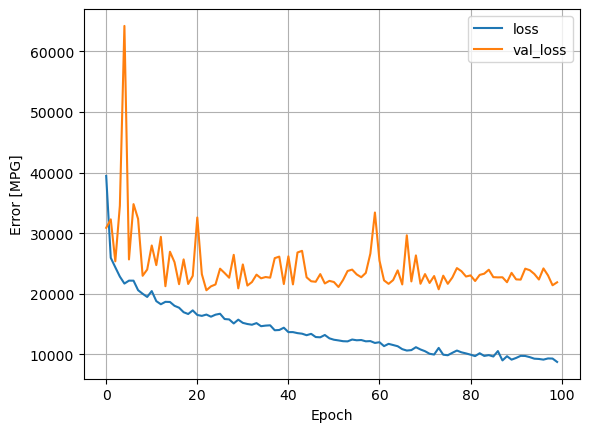

In [70]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

## MAE loss was not lower than 20,000! That could be a criteria

Let's try adding batch_size param

In [71]:
model = Sequential()
model.add(Input(shape = (X.shape[1],), batch_size=16))
model.add(Dense(100, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer="adam")
history = model.fit(x=X, y=Y, batch_size=16, epochs=100, validation_split=0.2)

Epoch 1/100
73/73 [==============================] - 1s 6ms/step - loss: 125037.4219 - val_loss: 37219.3320
Epoch 2/100
73/73 [==============================] - 0s 3ms/step - loss: 28725.6211 - val_loss: 28217.9375
Epoch 3/100
73/73 [==============================] - 0s 3ms/step - loss: 23624.3047 - val_loss: 25201.1836
Epoch 4/100
73/73 [==============================] - 0s 3ms/step - loss: 22454.7949 - val_loss: 26878.0938
Epoch 5/100
73/73 [==============================] - 0s 3ms/step - loss: 21626.8516 - val_loss: 23965.9082
Epoch 6/100
73/73 [==============================] - 0s 3ms/step - loss: 20024.7148 - val_loss: 23658.4824
Epoch 7/100
73/73 [==============================] - 0s 3ms/step - loss: 19128.2012 - val_loss: 26046.0605
Epoch 8/100
73/73 [==============================] - 0s 3ms/step - loss: 18918.8320 - val_loss: 22612.3887
Epoch 9/100
73/73 [==============================] - 0s 4ms/step - loss: 17813.4941 - val_loss: 25662.7129
Epoch 10/100
73/73 [================

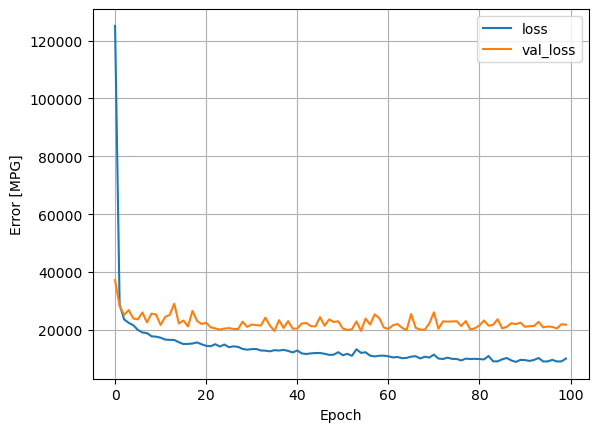

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

> Batching speeded up the training, smoothed training curve but it didn't help to break the barier of 20,000

The last try will be with increasing the training parameters

In [73]:
model = Sequential()
model.add(Input(shape = (X.shape[1],), batch_size=16))
model.add(Dense(1000, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (16, 1000)                37000     
                                                                 
 dense_36 (Dense)            (16, 1000)                1001000   
                                                                 
 dense_37 (Dense)            (16, 1000)                1001000   
                                                                 
 dense_38 (Dense)            (16, 1000)                1001000   
                                                                 
 dense_39 (Dense)            (16, 1000)                1001000   
                                                                 
 dense_40 (Dense)            (16, 1000)                1001000   
                                                                 
 dense_41 (Dense)            (16, 1)                  

In [74]:
model.compile(loss='mean_absolute_error', optimizer="adam")
history = model.fit(x=X, y=Y, batch_size=16, epochs=100, validation_split=0.2)

Epoch 1/100
73/73 [==============================] - 2s 23ms/step - loss: 64632.7109 - val_loss: 26866.6719
Epoch 2/100
73/73 [==============================] - 2s 21ms/step - loss: 24873.8711 - val_loss: 29934.8008
Epoch 3/100
73/73 [==============================] - 1s 20ms/step - loss: 22519.3262 - val_loss: 24623.8887
Epoch 4/100
73/73 [==============================] - 2s 22ms/step - loss: 22076.0137 - val_loss: 23158.7949
Epoch 5/100
73/73 [==============================] - 1s 20ms/step - loss: 22972.3125 - val_loss: 27317.6230
Epoch 6/100
73/73 [==============================] - 2s 22ms/step - loss: 22042.1973 - val_loss: 23284.1465
Epoch 7/100
73/73 [==============================] - 2s 21ms/step - loss: 20703.3730 - val_loss: 21971.9609
Epoch 8/100
73/73 [==============================] - 2s 22ms/step - loss: 20930.7578 - val_loss: 24977.6914
Epoch 9/100
73/73 [==============================] - 2s 21ms/step - loss: 20455.3965 - val_loss: 23104.0645
Epoch 10/100
73/73 [========

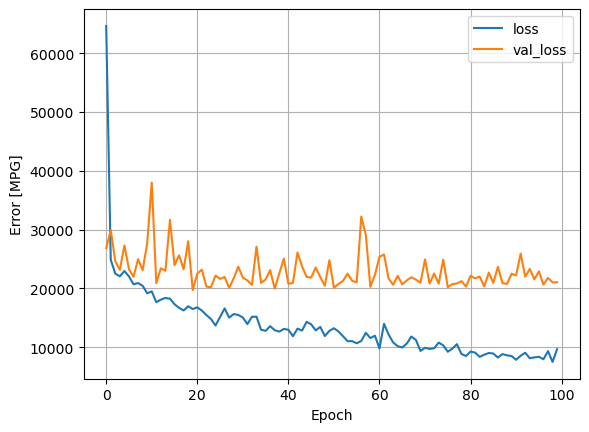

In [75]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

Just want to check the theory why training curve is not that smooth anymore

In [76]:
model = Sequential()
model.add(Input(shape = (X.shape[1],), batch_size=16))
model.add(Dense(100, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(500, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(500, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (16, 100)                 3700      
                                                                 
 dense_43 (Dense)            (16, 200)                 20200     
                                                                 
 dense_44 (Dense)            (16, 500)                 100500    
                                                                 
 dense_45 (Dense)            (16, 1000)                501000    
                                                                 
 dense_46 (Dense)            (16, 500)                 500500    
                                                                 
 dense_47 (Dense)            (16, 200)                 100200    
                                                                 
 dense_48 (Dense)            (16, 100)                

In [77]:
model.compile(loss='mean_absolute_error', optimizer="adam")
history = model.fit(x=X, y=Y, batch_size=16, epochs=100, validation_split=0.2)

Epoch 1/100
73/73 [==============================] - 1s 10ms/step - loss: 88031.3281 - val_loss: 32329.7051
Epoch 2/100
73/73 [==============================] - 0s 6ms/step - loss: 26038.6973 - val_loss: 24732.8945
Epoch 3/100
73/73 [==============================] - 0s 6ms/step - loss: 22902.6094 - val_loss: 23298.6445
Epoch 4/100
73/73 [==============================] - 0s 6ms/step - loss: 22495.7910 - val_loss: 29782.8281
Epoch 5/100
73/73 [==============================] - 1s 7ms/step - loss: 21338.5488 - val_loss: 32561.2871
Epoch 6/100
73/73 [==============================] - 1s 8ms/step - loss: 21213.2148 - val_loss: 24225.3301
Epoch 7/100
73/73 [==============================] - 0s 7ms/step - loss: 19909.0273 - val_loss: 25799.2090
Epoch 8/100
73/73 [==============================] - 0s 7ms/step - loss: 17546.0332 - val_loss: 24479.4785
Epoch 9/100
73/73 [==============================] - 0s 7ms/step - loss: 18302.8691 - val_loss: 20684.1250
Epoch 10/100
73/73 [================

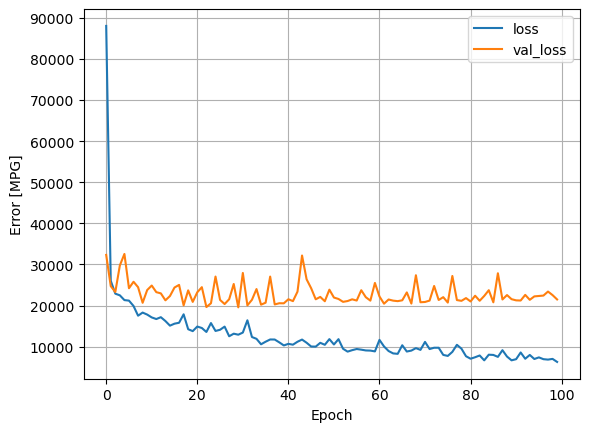

In [78]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [79]:
model = Sequential()
model.add(Input(shape = (X.shape[1],), batch_size=16))
model.add(Dense(10, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (16, 10)                  370       
                                                                 
 dense_51 (Dense)            (16, 20)                  220       
                                                                 
 dense_52 (Dense)            (16, 50)                  1050      
                                                                 
 dense_53 (Dense)            (16, 100)                 5100      
                                                                 
 dense_54 (Dense)            (16, 50)                  5050      
                                                                 
 dense_55 (Dense)            (16, 20)                  1020      
                                                                 
 dense_56 (Dense)            (16, 10)                 

In [80]:
model.compile(loss='mean_absolute_error', optimizer="adam")
history = model.fit(x=X, y=Y, batch_size=16, epochs=100, validation_split=0.2)

Epoch 1/100
73/73 [==============================] - 1s 6ms/step - loss: 180529.8281 - val_loss: 179793.5469
Epoch 2/100
73/73 [==============================] - 0s 2ms/step - loss: 146563.4062 - val_loss: 59307.9102
Epoch 3/100
73/73 [==============================] - 0s 2ms/step - loss: 43924.8320 - val_loss: 45991.8320
Epoch 4/100
73/73 [==============================] - 0s 2ms/step - loss: 34107.5312 - val_loss: 38323.2930
Epoch 5/100
73/73 [==============================] - 0s 2ms/step - loss: 29481.1641 - val_loss: 32746.8867
Epoch 6/100
73/73 [==============================] - 0s 2ms/step - loss: 27022.6934 - val_loss: 29684.9219
Epoch 7/100
73/73 [==============================] - 0s 2ms/step - loss: 24887.6875 - val_loss: 28221.7656
Epoch 8/100
73/73 [==============================] - 0s 3ms/step - loss: 23364.1133 - val_loss: 27874.4844
Epoch 9/100
73/73 [==============================] - 0s 3ms/step - loss: 22496.2422 - val_loss: 27031.9062
Epoch 10/100
73/73 [==============

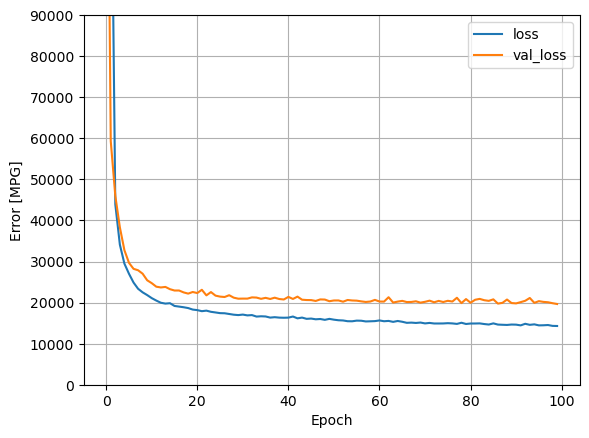

In [84]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 90000])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

- Theory has approved. The less neurons in the network - the smoother the learning curve is
- The best Loss is 20,000 for validation set!

That point of 20,000 is a baseline